In [155]:
#Imports

import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np
import itertools
from sklearn.metrics import classification_report
# jesse. jesse we have to train. 

In [124]:
# Converts the OCEAN dataset into features and labels
# Converts the labels provided by UCI Machine Learning to 0 if the person has never touched the drug or not used it in the last 10 years
# and 1 otherwise, for binary classification
# Allows users to query the whole OCEAN feature set, or a specific feature
def refactor(data, type):
     if type == 'ocean':
          features = data.filter(regex = 'score')
     else:
          features = data.filter(regex = type + 'score')
     labels = data.filter(regex = 'Amphet')
     
     labels['Amphet'] = labels['Amphet'].map({'CL0': 0, 
                                            'CL1': 0, 
                                            'CL2': 1, 
                                            'CL3': 1, 
                                            'CL4': 1, 
                                            'CL5': 1,
                                            'CL6': 1})

     return features, labels

def drugPrune(dataset, drug):   
    cols = []
    featured = dataset.iloc[:, :12]
    for column in featured:
        cols.append(column)
    label = drug
    full_drugs[str(drug)] = full_drugs[str(drug)].map({'CL0': 0, 
                                            'CL1': 0, 
                                            'CL2': 1, 
                                            'CL3': 1, 
                                            'CL4': 1, 
                                            'CL5': 1,
                                            'CL6': 1})
    X = dataset[cols]
    y = full_drugs[label]

    return X, y


In [125]:
# Imports the two datasets
ocean_drugs = pd.read_csv(r'tailored_drug_dataset.csv')
full_drugs = pd.read_csv(r'full_drug_dataset.csv')

In [135]:
# Creates and trains the logistic regression model for the OCEAN dataset
# Returns the classification matrix, training and testing accuracy, and the model
def trainModel(dataset, bigFive, test_size):
    X, y = refactor(dataset, bigFive)           # preprocessing

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)            # splits into training and testing sets based on a hyperparameter

    lr = LogisticRegression(max_iter= 1000)       # model
    lr.fit(X_train, y_train)        # fits the model
    y_pred = lr.predict(X_test)
    
    score_train = (lr.score(X_train, y_train))      # accuracy scores for training and testing
    score_test = (lr.score(X_test, y_test))

    # classification = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames= ['Predicted'])
    return classification_report(y_test, y_pred), score_train, score_test, lr
    # return score_train, score_test

In [136]:
testing = ['O', 'C', 'E', 'A', 'N']
# testing = ['all']
train_results = {}
test_results = {}
models = {}
# iterates through the 5 Big Five features and adds their accuracies to two dictionaries
for i in testing:
    results = trainModel(ocean_drugs, i, 0.2)
    train_results[i] = results[1]
    test_results[i] = results[2]
    models[i] = results[3]
    #print(results[0])      # classification matrix

/var/folders/gh/96n2f5tx5yv8ywqs48jsyz7m0000gn/T/ipykernel_814/1761737822.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels['Amphet'] = labels['Amphet'].map({'CL0': 0,
/Users/karenli/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/gh/96n2f5tx5yv8ywqs48jsyz7m0000gn/T/ipykernel_814/1761737822.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [137]:
# Calculates the best feature for the training and testing set, returns its accuracy
def findMaximum(results_List):
    max_test = max(list(results_List.values()))     
    max_index = list(results_List.values()).index(max_test)

    max_col = list(results_List.keys())[max_index]
    return (max_col, max_test)

training_Max = findMaximum(train_results)
testing_Max = findMaximum(test_results)
print("The best feature of the OCEAN big five for the training set is " + training_Max[0] + " with an accuracy of " + str(training_Max[1]))
print("The best feature of the OCEAN big five for the testing set is " + testing_Max[0] + " with an accuracy of " + str(testing_Max[1]))

The best feature of the OCEAN big five for the training set is O with an accuracy of 0.656498673740053
The best feature of the OCEAN big five for the testing set is E with an accuracy of 0.6525198938992043


In [ ]:
max_results = trainModel(ocean_drugs, testing_Max[0], 0.2)
max_model = max_results[3]

#confusion_matrix_max = max_results[0]
#print(confusion_matrix_max)
#sn.heatmap(confusion_matrix_max, annot=True)

#plt.show()

[[-0.07330225]]
-0.5613898759004612


/var/folders/gh/96n2f5tx5yv8ywqs48jsyz7m0000gn/T/ipykernel_814/1761737822.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels['Amphet'] = labels['Amphet'].map({'CL0': 0,


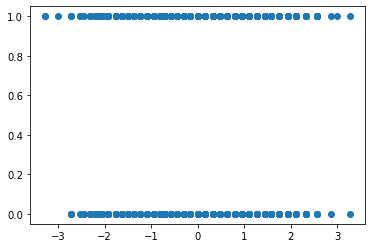

In [171]:
b = max_model.intercept_[0]
coef = max_model.coef_
print(coef)
print(b)

xmin, xmax = -1, 0
ymin, ymax = -1, 0
xd = np.array([xmin, xmax])
yd = coef*xd + b
yd = list(itertools.chain.from_iterable(yd))


X, y = refactor(ocean_drugs, testing_Max[0])
X = X.values.tolist()
y = y.values.tolist()
plt.scatter(X, y)
#plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
#plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)
#print(w1, w2)

In [ ]:
def cycle_all(data, name):
    features = data.filter(regex = name)
    labels = data.filter(regex = 'Amphet')
     
    labels['Amphet'] = labels['Amphet'].map({'CL0': 0, 
                                            'CL1': 0, 
                                            'CL2': 1, 
                                            'CL3': 1, 
                                            'CL4': 1, 
                                            'CL5': 1,
                                            'CL6': 1})
    return features, labels
   

In [ ]:
def trainFullModel(X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)

    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    
    #score_train = (lr.score(X_train, y_train))
    #score_test = (lr.score(X_test, y_test))

    return classification_report(y_test, y_pred)
    # return score_train, score_test

In [ ]:
featured = full_drugs.iloc[:, full_drugs.columns != 'Amphet']

for column in featured:
    features, labels = cycle_all(full_drugs, column)
    #features = crimped.filter(regex = column)
    print(trainFullModel(features, labels, 0.2))


In [ ]:
features, labels = cycle_all(full_drugs, "O_score")
print(trainFullModel(featured, labels, 0.2))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       240
           1       0.65      0.51      0.57       137

    accuracy                           0.72       377
   macro avg       0.70      0.68      0.68       377
weighted avg       0.72      0.72      0.72       377



/var/folders/gh/96n2f5tx5yv8ywqs48jsyz7m0000gn/T/ipykernel_814/2628955122.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels['Amphet'] = labels['Amphet'].map({'CL0': 0,
/Users/karenli/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
